# TO EXPLORE SUPERVISED MACHINE LEARNING

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [27]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [28]:
#importing data
data=pd.read_csv("http://bit.ly/w-data")

In [29]:
#whole dataset
data.style.background_gradient("Greens")

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


In [30]:
data.info() #it shows dataframe does not contain any null value.
#also this shows that dataframe does not have an object datatype data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
#descriptive statistics of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##  to find correlation between features of data.(i.e "Hours" and "Scores")

#### we use pearson correlation way

In [32]:
x=data[["Hours"]]
y=data[["Scores"]]

In [33]:
from scipy import stats
pearson_coef,p_value=stats.pearsonr(data["Hours"],data["Scores"])
print("pearson correlation:{}".format(pearson_coef))
print("p-value:{}".format(p_value))

pearson correlation:0.9761906560220884
p-value:9.132624467460325e-17


from the pearson correlation value and p-value, it is clear that features have strong correlation

## Let's visualize features to support the pearson correlation 

Text(0, 0.5, 'Scores')

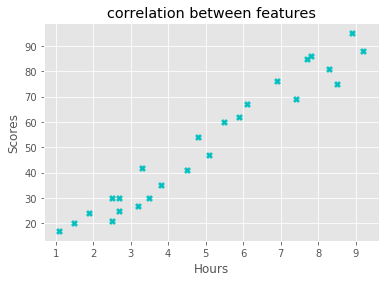

In [41]:
plt.scatter(x,y,marker="X",color="c")
plt.title("correlation between features")
plt.xlabel("Hours")
plt.ylabel("Scores")


plot shows that there is positive relation between features.

### training of data and model evaluation

In [35]:
#splitting of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=42)

In [36]:
# training of model using linear regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
prediction=lin_reg.predict(x_test)

In [37]:
#performing model evaluation 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("mean_squared_error:{}".format(mean_squared_error(y_test,prediction)))
print("mean_absolute_error:{}".format(mean_absolute_error(y_test,prediction)))
print("R-squared value:{}".format(lin_reg.score(x_test,y_test)))

mean_squared_error:23.516396034595225
mean_absolute_error:4.425394675156183
R-squared value:0.9553509219739938


##### let's compare visually predicted value and actual value.

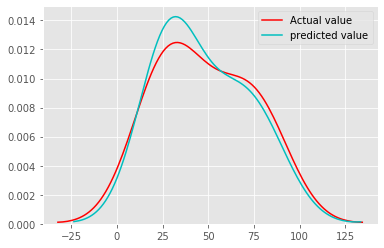

In [38]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual value")
sns.distplot(prediction,hist=False,color="c",label="predicted value",ax=ax1)

from the results we can say that our model is fitted well.

## let's plot regression line to visualize trend line in data.

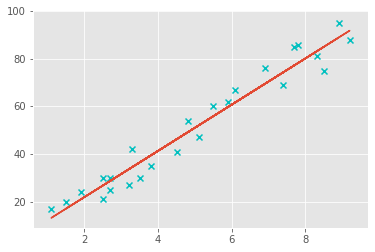

In [39]:
line=lin_reg.intercept_+(lin_reg.coef_*x)
ax1=plt.plot(x,lin_reg.predict(x))
plt.scatter(x,y,marker="x",color="c")

### predicting percentage score if student studied for 9.25 hours. 

In [40]:
score=lin_reg.predict([[9.25]])
print("Percent Score:{}".format(score[0]))

Percent Score:[92.33571987]
